In [2]:
#print(os.getcwd())

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

In [4]:
# # Analyzing the dataset
# advert_report = sv.analyze(df_0)
# advert_report.show_html('EDA_BD_inicial_churn.html')

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_0 = pd.read_csv('/workspaces/Template-Bootcamp/data/Inputs/Titanic-Dataset.csv')
df_0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Presentamos las dimensiones del Dataframe para darnos una idea de la cantidad de datos con los que vamos a trabajar:

In [3]:
# Dimensiones del Dataframe
df_0.shape

(891, 12)

Identificamos que tenemos 7043 observaciones con 46 variables.

Vamos a validar la cantidad de nulos por variable:

In [4]:
np.sum(df_0.isnull(), axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Cantidad de valores únicos por variable
df_0.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
# Tipos de variables
df_0.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# Conteo de la variable 'Churn Value'
print(df_0["Survived"].value_counts())
print(df_0["Survived"].value_counts(10))

Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [10]:
df_0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_0['Cabin'].value_counts().sort_index()

Cabin
A10                1
A14                1
A16                1
A19                1
A20                1
A23                1
A24                1
A26                1
A31                1
A32                1
A34                1
A36                1
A5                 1
A6                 1
A7                 1
B101               1
B102               1
B18                2
B19                1
B20                2
B22                2
B28                2
B3                 1
B30                1
B35                2
B37                1
B38                1
B39                1
B4                 1
B41                1
B42                1
B49                2
B5                 2
B50                1
B51 B53 B55        2
B57 B59 B63 B66    2
B58 B60            2
B69                1
B71                1
B73                1
B77                2
B78                1
B79                1
B80                1
B82 B84            1
B86                1
B94                1
B96 B98

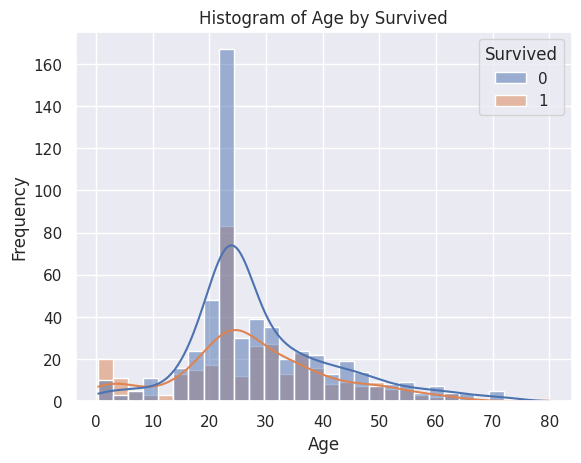

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df and it has 'age' and 'survived' columns
sns.histplot(data=df_0, x='Age', hue='Survived' , multiple='layer', kde=True)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age by Survived')

# Show the plot
plt.show()

In [13]:
# Reemplazar valores nulos en columnas de tipo objeto con una cadena vacía
columns_to_fill_with_empty_string = ['Cabin','Embarked']
df_0[columns_to_fill_with_empty_string] = df_0[columns_to_fill_with_empty_string].fillna('Sin_info')

# Reemplazar valores nulos en 'Customer Satisfaction' con -1
#df_0['Customer Satisfaction'] = df_0['Customer Satisfaction'].fillna(-1)

# Verificar que ya no hay valores nulos
print(df_0.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64


In [28]:
# Assuming your DataFrame is called df and it has 'age' and 'survived' columns
# Calculate the mode of the 'age' column
age_mode = df_0['Age'].mode()[0]

# Fill missing values with the mode
df_0['Age'].fillna(age_mode, inplace=True)

In [30]:
df_0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Sin_info,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Sin_info,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Sin_info,S


#### **Precision, Recall**

<figure>
<center>
<img src='https://github.com/jofepe16/Template-Bootcamp/blob/main/data/Inputs/Images/matriz_confusion.png?raw=tru' width="350" height="250" />
<figcaption></figcaption></center>
</figure>


* **Precision:** ¿de las predicciones positivas de mi algoritmo, cuantas son realmente positivas?. De todas las veces que mi modelo predice que un cliente va a abandonar, ¿cuántos realmente lo hacen?

$$ Precision =  \frac{TP}{TP+FP}$$

$$ Precision =  \frac{80}{80+10}$$

$$ Precision =  0.89$$

Precision se enfoca en la exactitud de las predicciones positivas del algoritmo, asegurando que las predicciones que hace como positivas sean lo más correctas posible.
Espero que esto te ayude a entender mejor estas métricas. Supongamos que el modelo predice que 90 clientes abandonarán el servicio en los próximos 6 meses. De estos 90, realmente 80 abandonan el servicio (Verdaderos Positivos, TP). 10 clientes no abandonan el servicio (Falsos Positivos, FP).




* **Recall (Sensibilidad):** ¿De todos los casos actuales, cuantos logra identificar mi algoritmo?. De todos los clientes que realmente abandonan el servicio, ¿cuántos logra identificar correctamente mi modelo?

$$ Recall =  \frac{TP}{TP+FN}$$

$$ Recall =  \frac{80}{80+20}$$

$$ Recall =  0.80$$

Recall te dice qué tan bien tu modelo detecta a los clientes que realmente van a abandonar. Un alto Recall significa que estás capturando la mayoría de los clientes que van a abandonar, pero podrías también estar incluyendo algunos que no lo harán (más falsos positivos). Supongamos que tienes un modelo que predice si los clientes van a abandonar el servicio en los próximos 6 meses. En realidad, 100 clientes están a punto de abandonar el servicio. Tu modelo identifica correctamente a 80 de estos clientes como de riesgo alto (Verdaderos Positivos, TP) y no identifica a 20 clientes que también van a abandonar (Falsos Negativos, FN)




## **Regresión logística**


La regresión logística es un modelo de clasificación que predice la probabilidad de que una observación pertenezca a una clase específica. Utiliza una función logística (sigmoide) para transformar la salida lineal en un valor entre 0 y 1, representando la probabilidad de pertenecer a la clase positiva. Es útil para problemas con dos clases, como detectar si un cliente se irá o se quedará.

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Identificar características numéricas y categóricas
num_features = df_0.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df_0.select_dtypes(include=['object']).columns.tolist()

In [33]:
# Codificar variables categóricas
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    df_0[col] = le.fit_transform(df_0[col].astype(str))
    label_encoders[col] = le

In [34]:
df_0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,146,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,146,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,146,2


In [41]:
# Separar características y variable objetivo
X = df_0.drop(columns=['Survived','PassengerId'])  # Eliminamos 'Customer ID' y 'Churn Value' ya que no son características
y = df_0['Survived']

In [20]:
# print(result.summary())

In [42]:
# Actualizar num_features y cat_features después de eliminar 'Churn Value'
num_features = [col for col in num_features if col in X.columns]
cat_features = [col for col in cat_features if col in X.columns]

## **Imagina que tienes una base de datos de clientes**


<figure>
<center>
<img src='https://github.com/jofepe16/Template-Bootcamp/blob/main/data/Inputs/Images/Train_test.png?raw=true' width="750" height="250" />
<figcaption></figcaption></center>
</figure>

 1. **Clientes (Base de Datos)**: Es como una lista de todos tus clientes. Cada cliente tiene información sobre si han cancelado el servicio (churn) o no.

 2. **Dividir la base de datos (Entrenamiento y Prueba)**:
 * Entrenamiento (X_train, y_train): Imagina que tomas una parte de esta lista para entrenar tu modelo. Usamos esta parte para enseñar a nuestro modelo cómo es un cliente que se queda y uno que se va. 
 * Prueba (X_test, y_test): Guardamos otra parte de la lista para probar cómo lo ha aprendido el modelo. Esto nos ayuda a ver si el modelo hace un buen trabajo prediciendo qué clientes podrían cancelar el servicio en el futuro.

**¿Cómo funciona?**

* Entrenar: Usamos X_train (información de clientes) y y_train (si cancelaron o no) para enseñar al modelo. Es como cuando practicas para un examen usando algunos ejercicios.

* Probar: Luego, usamos X_test (nueva información de clientes) y y_test (resultados reales si cancelaron o no) para ver si el modelo predice correctamente. Es como tomar el examen real después de haber practicado.

En resumen, entrenar es como estudiar, y probar es como hacer el examen para ver si aprendiste bien.

In [43]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [44]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Normalizar características numéricas
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [45]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
329,-1.599696,363,0,-0.974557,-0.460103,0.829588,7,0.490420,17,0
749,0.815964,176,1,0.183750,-0.460103,-0.474312,287,-0.472168,146,1
203,0.815964,878,1,1.303447,-0.460103,-0.474312,177,-0.482229,146,0
421,0.815964,155,1,-0.588455,-0.460103,-0.474312,534,-0.472488,146,1
97,-1.599696,308,1,-0.434014,-0.460103,0.829588,612,0.593505,91,0


In [46]:
# Media y Desviación Estandar
print (round(X_train["Fare"].mean(),2))
print (round(X_train["Fare"].std(),2))

-0.0
1.0


In [47]:
# Entrenar modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [48]:
# Predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [49]:
# Métricas en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

In [51]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 58.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 7.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [52]:
import statsmodels.api as sm
# Add a constant to the model (intercept)
X = sm.add_constant(X)

In [53]:
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.439481
         Iterations 6


In [54]:
# Print the summary
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                           10
Date:                Tue, 13 Aug 2024   Pseudo R-squ.:                  0.3400
Time:                        20:06:27   Log-Likelihood:                -391.58
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.693e-80
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4430      0.634      8.592      0.000       4.201       6.685
Pclass        -0.9576      0.166     -5.764      0.000      -1.283      -0.632
Name          -0.0004      0.000     -1.206      0.2

In [32]:
# # Importancia de características
# importance = model.coef_[0]
# features = X.columns
# feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# plt.figure(figsize=(12, 8))
# sns.barplot(x='Importance', y='Feature', data=feature_importance)
# plt.title('Feature Importance')
# plt.show()

Train Accuracy: 0.7949438202247191
Train AUC: 0.8551060209967217
Train Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       435
           1       0.75      0.71      0.73       277

    accuracy                           0.79       712
   macro avg       0.79      0.78      0.78       712
weighted avg       0.79      0.79      0.79       712



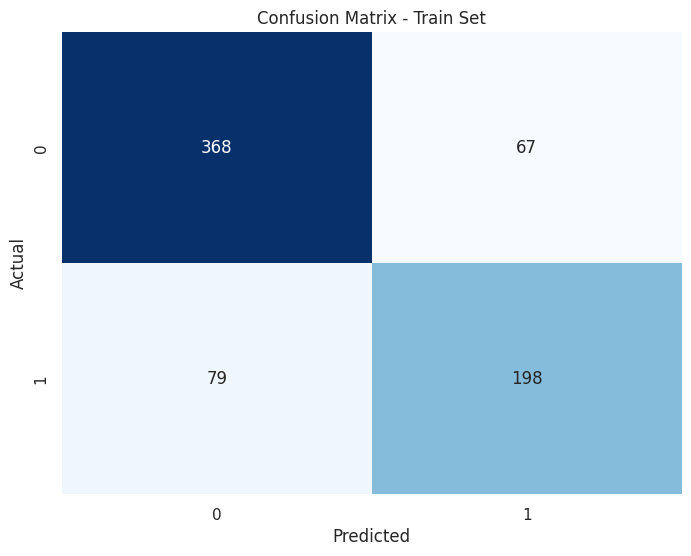

In [56]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred_proba)
train_report = classification_report(y_train, y_train_pred)

print('Train Accuracy:', train_accuracy)
print('Train AUC:', train_auc)
print('Train Classification Report:\n', train_report)

# Matriz de confusión en el conjunto de entrenamiento
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Test Accuracy: 0.8100558659217877
Test AUC: 0.8859649122807018
Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       114
           1       0.71      0.80      0.75        65

    accuracy                           0.81       179
   macro avg       0.79      0.81      0.80       179
weighted avg       0.82      0.81      0.81       179



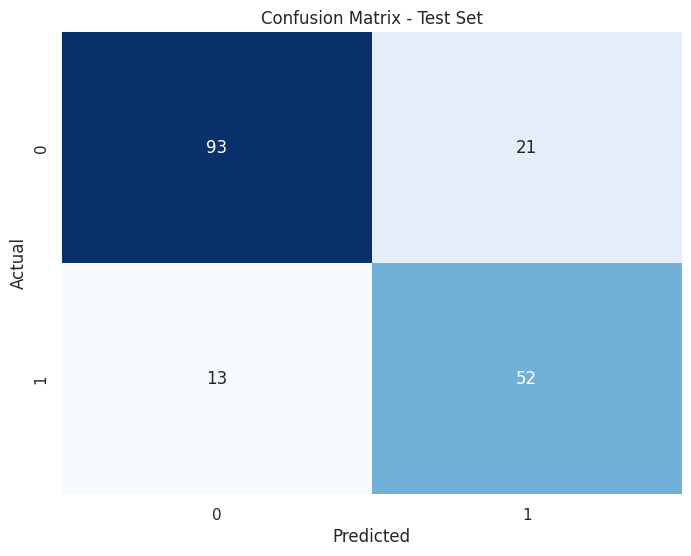

In [57]:
# Métricas en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_pred)
test_auc = roc_auc_score(y_test, y_pred_proba)
test_report = classification_report(y_test, y_pred)

print('Test Accuracy:', test_accuracy)
print('Test AUC:', test_auc)
print('Test Classification Report:\n', test_report)

# Matriz de confusión en el conjunto de prueba
test_conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [58]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
329,-1.599696,363,0,-0.974557,-0.460103,0.829588,7,0.490420,17,0
749,0.815964,176,1,0.183750,-0.460103,-0.474312,287,-0.472168,146,1
203,0.815964,878,1,1.303447,-0.460103,-0.474312,177,-0.482229,146,0
421,0.815964,155,1,-0.588455,-0.460103,-0.474312,534,-0.472488,146,1
97,-1.599696,308,1,-0.434014,-0.460103,0.829588,612,0.593505,91,0


In [59]:
accuracy_train_lr = round(100.0*accuracy_score(y_train, y_train_pred),2)
accuracy_test_lr = round(100.0*accuracy_score(y_test, y_pred),2)
auc_lr = roc_auc_score(y_train, y_train_pred_proba)

# Compute the classification report
report_lr = classification_report(y_test, y_pred, output_dict=True)
# Extract precision, recall, F-1 score for class 1
precision_class_1_lr = report_lr['1']['precision']
recall_class_1_lr = report_lr['1']['recall']
f1_class_1_lr = report_lr['1']['f1-score']

* **Recall Train:**

$$ Recall =  \frac{TP}{TP+FN}$$

$$ Recall =  \frac{6}{6+151}$$

$$ Recall =  0.0382$$

* **Precision Train:**

$$ Precision =  \frac{TP}{TP+FP}$$

$$ Precision =  \frac{6}{6+4}$$

$$ Precision =  0.6$$

In [60]:
X_train.shape

(712, 10)

### **Modelo 1 Random Forest**

<figure>
<center>
<img src='https://github.com/jofepe16/Template-Bootcamp/blob/main/data/Inputs/Images/random_forest_2.png?raw=tru' width="550" height="250" />
<figcaption></figcaption></center>
</figure>

Un Random Forest es un modelo de aprendizaje automático que usa un grupo de árboles de decisión para hacer predicciones.

**¿Cómo funciona?**

1. Árboles de Decisión: Un árbol de decisión toma decisiones de forma jerárquica, dividiendo los datos en diferentes categorías basadas en características.

2. Bosque Aleatorio: En lugar de un solo árbol, Random Forest crea muchos árboles de decisión (un "bosque") y los combina para hacer una predicción más precisa y estable.

3. Promedio de Resultados: Para la clasificación, el modelo vota por la categoría más común entre los árboles. Para la regresión, promedia las predicciones de todos los árboles.

Ventajas

* Menos Riesgo de Sobreajuste: Combina múltiples árboles, lo que reduce el riesgo de que el modelo se ajuste demasiado a los datos de entrenamiento.
* Precisión Mejorada: Generalmente, proporciona predicciones más precisas que un solo árbol de decisión.
* En resumen, Random Forest es como pedir la opinión de muchos expertos (árboles de decisión) y tomar una decisión basada en la mayoría.


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

## Generación del modelo
rf_model = RandomForestClassifier(random_state = 120, n_estimators=20, max_samples=0.5, max_depth=7)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=7, max_samples=0.5, n_estimators=20,
                       random_state=120)

In [62]:
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 89.61
Precisión sobre los datos de test: 85.47


Classification report for classifier RandomForestClassifier(max_depth=7, max_samples=0.5, n_estimators=20,
                       random_state=120):
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       435
           1       0.91      0.82      0.86       277

    accuracy                           0.90       712
   macro avg       0.90      0.88      0.89       712
weighted avg       0.90      0.90      0.89       712




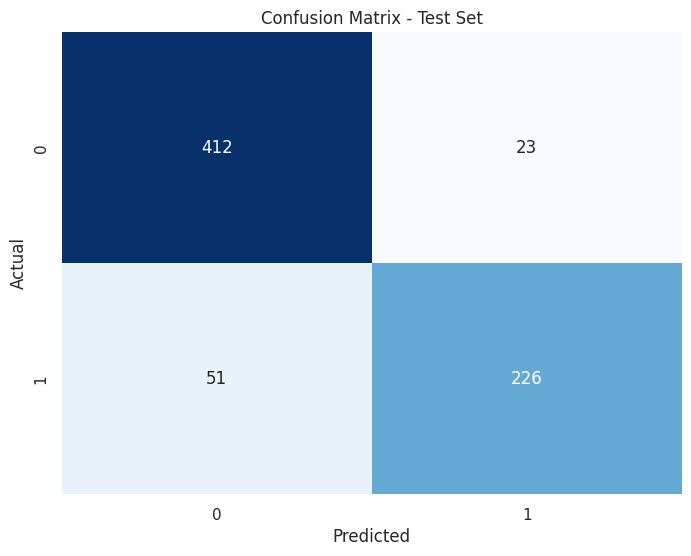

In [63]:
print(f"Classification report for classifier {rf_model}:\n"
      f"{metrics.classification_report(y_train, pred_train)}\n")

# Matriz de confusión en el conjunto de prueba
test_conf_matrix = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification report for classifier RandomForestClassifier(max_depth=7, max_samples=0.5, n_estimators=20,
                       random_state=120):
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       114
           1       0.82      0.77      0.79        65

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179




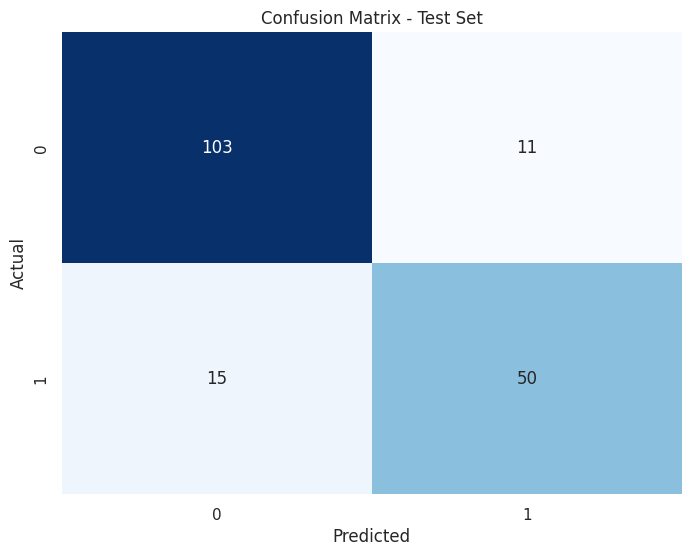

In [64]:
print(f"Classification report for classifier {rf_model}:\n"
      f"{metrics.classification_report(y_test, pred_test)}\n")

# Matriz de confusión en el conjunto de prueba
test_conf_matrix = confusion_matrix(y_test, pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### **Optimización n_estimators**

El siguiente paso seria optimizar el n_estimators. Para ello partiremos del max_depth=9 calculado en el apartado anterior y haremos el recorrido entre 1 y 100 para encontrar el mejor valor:

In [71]:
md_list = []
score_train_list = []
score_test_list = []

for n_estimators in list(range(1,30,1)):
  rf_model = RandomForestClassifier(random_state=0, max_depth=6, n_estimators=n_estimators, n_jobs=5)
  rf_model.fit(X_train, y_train)

  ## Generación de listas
  md_list.append(n_estimators)
  score_train_list.append(100.0*rf_model.score(X_train, y_train))
  score_test_list.append(100.0*rf_model.score(X_test, y_test))

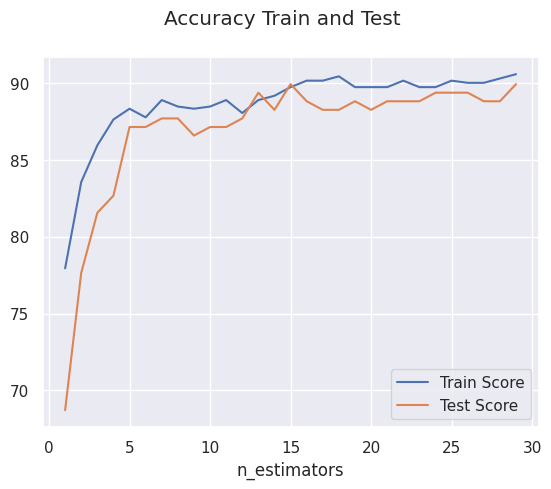

In [72]:
df_graph = pd.DataFrame({"n_estimators":md_list,
                   "score_train":score_train_list,
                   "score_test":score_test_list})

df_graph.set_index("n_estimators", inplace=True)
df_graph["score_train"].plot(label="Train Score")
df_graph["score_test"].plot(label="Test Score")
plt.suptitle("Accuracy Train and Test")
plt.legend()
plt.show();

#### **Optimización max_depth**

Empezaremos por optimizar el valor de max_depth:

In [75]:
md_list = []
score_train_list = []
score_test_list = []

for maxdepth in list(range(1,15,1)):
  rf_model = RandomForestClassifier(random_state=0, n_estimators=30, max_depth=maxdepth, n_jobs=5)
  rf_model.fit(X_train, y_train)

  ## Generación de listas
  md_list.append(maxdepth)
  score_train_list.append(100.0*rf_model.score(X_train, y_train))
  score_test_list.append(100.0*rf_model.score(X_test, y_test))

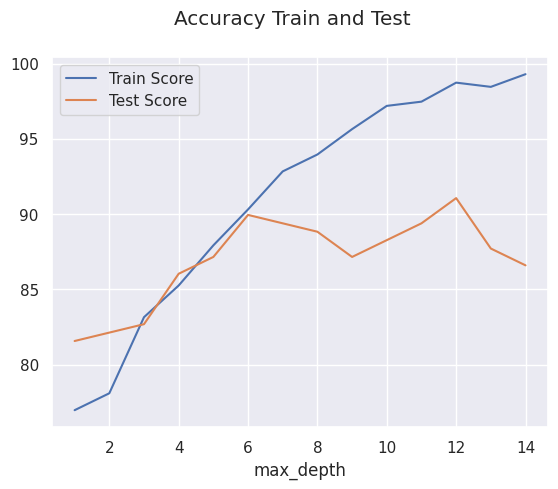

In [76]:
df_graph = pd.DataFrame({"max_depth":md_list,
                   "score_train":score_train_list,
                   "score_test":score_test_list})

df_graph.set_index("max_depth", inplace=True)
df_graph["score_train"].plot(label="Train Score")
df_graph["score_test"].plot(label="Test Score")
plt.suptitle("Accuracy Train and Test")
plt.legend()
plt.show();

In [77]:
## Generación del modelo
rf_model_tunned = RandomForestClassifier(random_state = 120, n_estimators=25, max_samples=0.5, max_depth=6)
rf_model_tunned.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_samples=0.5, n_estimators=25,
                       random_state=120)

In [78]:
pred_train_tunned = rf_model_tunned.predict(X_train)
pred_test_tunned = rf_model_tunned.predict(X_test)

print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model_tunned.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model_tunned.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 88.48
Precisión sobre los datos de test: 88.83


In [48]:
rf_model_tunned.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_samples=0.5, n_estimators=20,
                       random_state=120)

Classification report for classifier RandomForestClassifier(max_depth=6, max_samples=0.5, n_estimators=25,
                       random_state=120):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       435
           1       0.89      0.81      0.84       277

    accuracy                           0.88       712
   macro avg       0.89      0.87      0.88       712
weighted avg       0.89      0.88      0.88       712




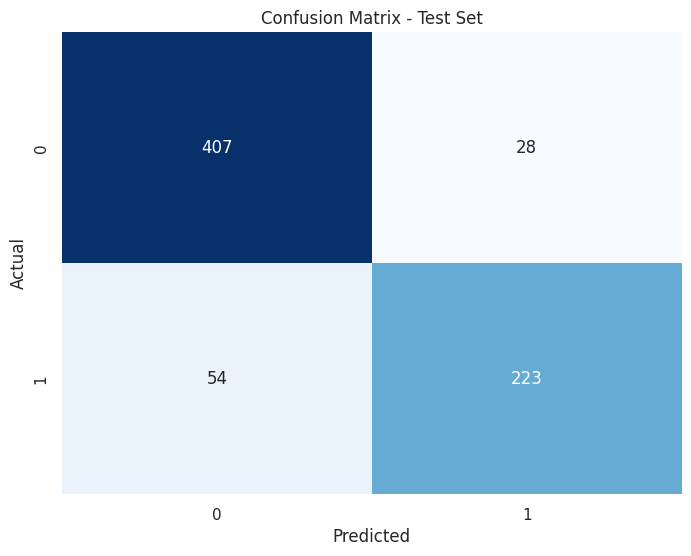

In [79]:
print(f"Classification report for classifier {rf_model_tunned}:\n"
      f"{metrics.classification_report(y_train, pred_train_tunned)}\n")

# Matriz de confusión en el conjunto de prueba
test_conf_matrix = confusion_matrix(y_train, pred_train_tunned)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification report for classifier RandomForestClassifier(max_depth=6, max_samples=0.5, n_estimators=25,
                       random_state=120):
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       114
           1       0.88      0.80      0.84        65

    accuracy                           0.89       179
   macro avg       0.89      0.87      0.88       179
weighted avg       0.89      0.89      0.89       179




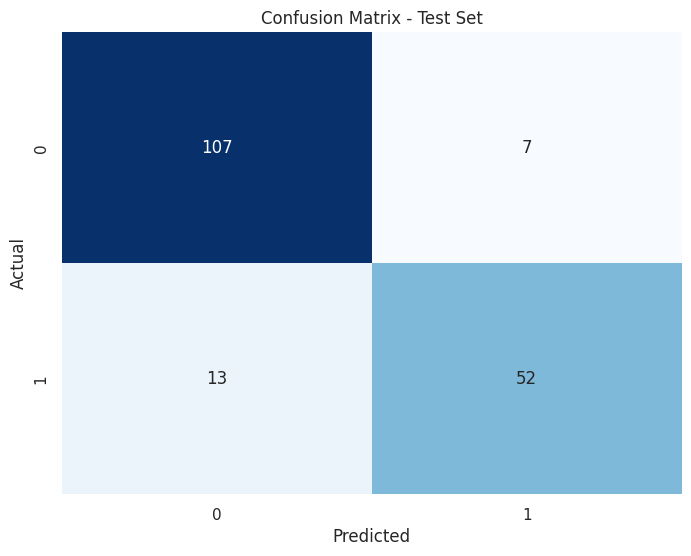

In [80]:
print(f"Classification report for classifier {rf_model_tunned}:\n"
      f"{metrics.classification_report(y_test, pred_test_tunned)}\n")

# Matriz de confusión en el conjunto de prueba
test_conf_matrix = confusion_matrix(y_test, pred_test_tunned)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Figure size 1200x800 with 0 Axes>

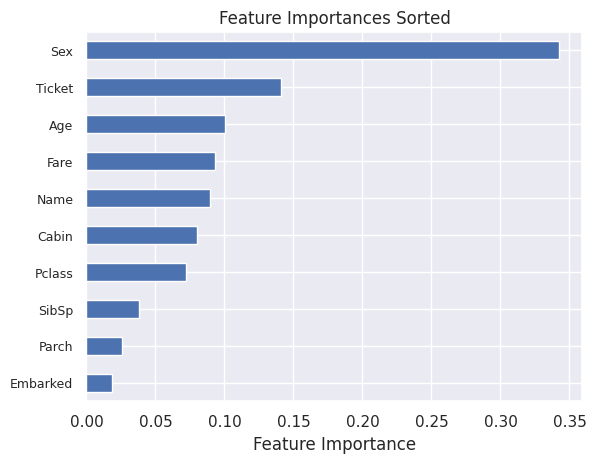

In [81]:
# Gráfico de las variables mas relevantes
df_imp_rf = pd.DataFrame(rf_model_tunned.feature_importances_.reshape(1,-1), 
                         columns=X_train.columns, 
                         index=["Feature Importances"])

# Transpose and sort by feature importance
df_imp_rf = df_imp_rf.T.sort_values(by="Feature Importances", ascending=True)

# Increase the figure size and reduce the font size for y-axis labels
plt.figure(figsize=(12, 8))  # Adjust the figsize as needed
ax = df_imp_rf.plot.barh(legend=False)

# Set smaller font size for the y-axis labels
ax.set_yticklabels(df_imp_rf.index, fontsize=9)  # Adjust fontsize as needed

plt.xlabel('Feature Importance')
plt.title('Feature Importances Sorted')
plt.show()

In [82]:
accuracy_train_rf = round(100.0*accuracy_score(y_train, pred_train_tunned),2)
accuracy_test_rf = round(100.0*accuracy_score(y_test, pred_test_tunned),2)
auc_rf = roc_auc_score(y_train, pred_train_tunned)

# Compute the classification report
report_rf = classification_report(y_test, pred_test_tunned, output_dict=True)
# Extract precision, recall, F-1 score for class 1
precision_class_1_rf = report_rf['1']['precision']
recall_class_1_rf = report_rf['1']['recall']
f1_class_1_rf = report_rf['1']['f1-score']

## **Modelo Gradient Boosting**


In [83]:
from sklearn.ensemble import GradientBoostingClassifier

# Generación del modelo inicial
gb_model = GradientBoostingClassifier(random_state=2023, max_depth=3, n_estimators=20, learning_rate=0.2, max_features=18 )
gb_model.fit(X_train, y_train)

pred_test_gb = gb_model.predict(X_test)
pred_train_gb = gb_model.predict(X_train)

print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*gb_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*gb_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 89.47
Precisión sobre los datos de test: 87.15


Classification report for classifier GradientBoostingClassifier(learning_rate=0.2, max_features=18, n_estimators=20,
                           random_state=2023):
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       435
           1       0.90      0.82      0.86       277

    accuracy                           0.89       712
   macro avg       0.90      0.88      0.89       712
weighted avg       0.89      0.89      0.89       712




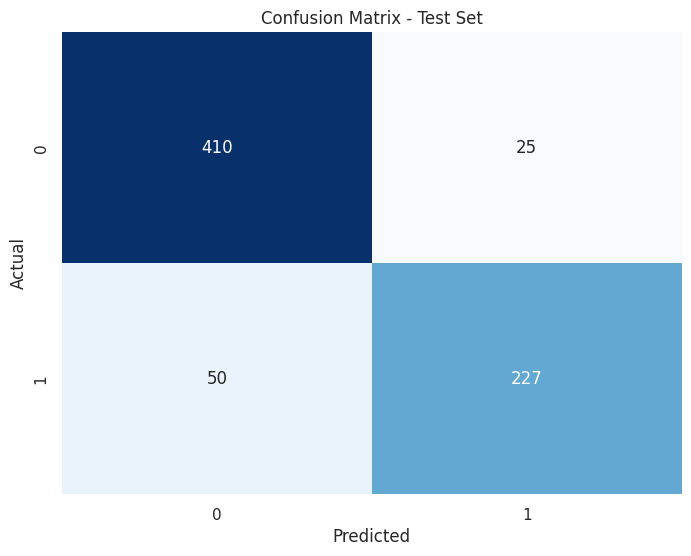

In [84]:
print(f"Classification report for classifier {gb_model}:\n"
      f"{metrics.classification_report(y_train, pred_train_gb)}\n")

# Matriz de confusión en el conjunto de prueba
test_conf_matrix = confusion_matrix(y_train, pred_train_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Classification report for classifier GradientBoostingClassifier(learning_rate=0.2, max_features=18, n_estimators=20,
                           random_state=2023):
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       114
           1       0.81      0.85      0.83        65

    accuracy                           0.87       179
   macro avg       0.86      0.87      0.86       179
weighted avg       0.87      0.87      0.87       179




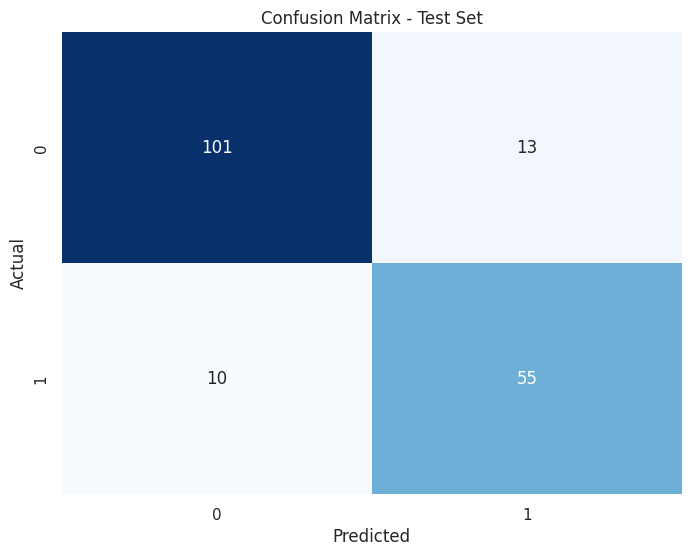

In [85]:
print(f"Classification report for classifier {gb_model}:\n"
      f"{metrics.classification_report(y_test, pred_test_gb)}\n")

# Matriz de confusión en el conjunto de prueba
test_conf_matrix = confusion_matrix(y_test, pred_test_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Figure size 1200x800 with 0 Axes>

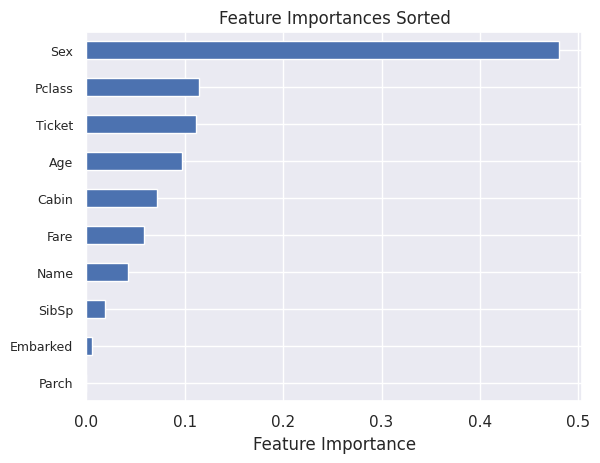

In [86]:
# Gráfico de las variables mas relevantes
df_imp_rf = pd.DataFrame(gb_model.feature_importances_.reshape(1,-1), 
                         columns=X_train.columns, 
                         index=["Feature Importances"])

# Transpose and sort by feature importance
df_imp_rf = df_imp_rf.T.sort_values(by="Feature Importances", ascending=True)

# Increase the figure size and reduce the font size for y-axis labels
plt.figure(figsize=(12, 8))  # Adjust the figsize as needed
ax = df_imp_rf.plot.barh(legend=False)

# Set smaller font size for the y-axis labels
ax.set_yticklabels(df_imp_rf.index, fontsize=9)  # Adjust fontsize as needed

plt.xlabel('Feature Importance')
plt.title('Feature Importances Sorted')
plt.show()

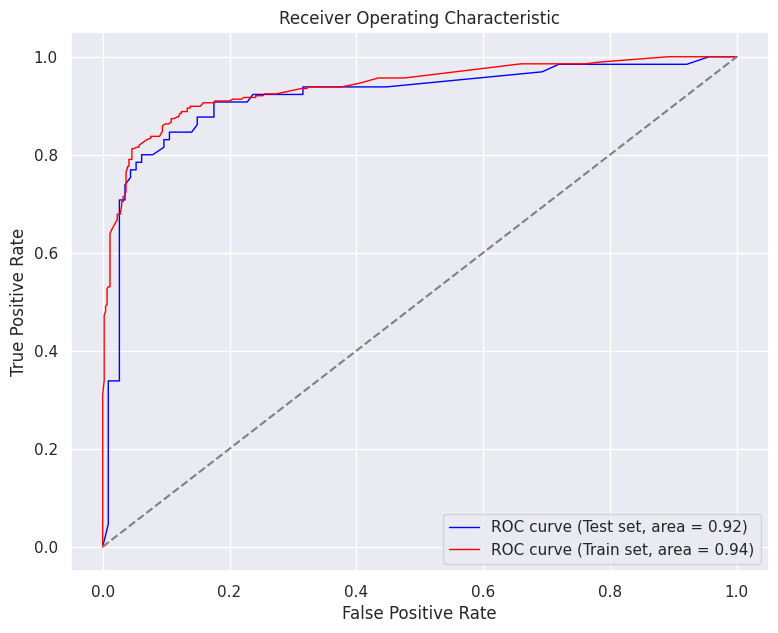

In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Get predicted probabilities for test set
y_score_test = gb_model.predict_proba(X_test)[:, 1]
y_score_train = gb_model.predict_proba(X_train)[:, 1]

# Compute ROC curve for test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Compute ROC curve for train set
fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Plot ROC curve for test set
plt.figure(figsize=(9, 7))
plt.plot(fpr_test, tpr_test, color='blue', lw=1, label='ROC curve (Test set, area = %0.2f)' % roc_auc_test)

# Plot ROC curve for train set
plt.plot(fpr_train, tpr_train, color='red', lw=1, label='ROC curve (Train set, area = %0.2f)' % roc_auc_train)

# Plot a diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and title
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [88]:
accuracy_train_gb = round(100.0*accuracy_score(y_train, pred_train_gb),2)
accuracy_test_gb = round(100.0*accuracy_score(y_test, pred_test_gb),2)
auc_gb = roc_auc_score(y_train, pred_train_gb)

# Compute the classification report
report_gb = classification_report(y_test, pred_test_gb, output_dict=True)
# Extract precision, recall, F-1 score for class 1
precision_class_1_gb = report_gb['1']['precision']
recall_class_1_gb = report_gb['1']['recall']
f1_class_1_gb = report_gb['1']['f1-score']

## **Comparación Modelos**

Ahora, vamos a contruir un dataframe unificado con las metricas que hemos calculado y guardado para cada modelo con el fin de poder comparar:

In [89]:
# Creación de un dataframe unificado con las metricas de cada modelo construido
models_summary = pd.DataFrame({'Model':['Logistic Regression', 'Random Forest Clasiffier', 'Gradient Boosting Clasiffier'],
                            'Accuracy Train':[accuracy_train_lr, accuracy_train_rf, accuracy_train_gb],
                            'Accuracy Test':[accuracy_test_lr, accuracy_test_rf, accuracy_test_gb],
                            'AUC':[auc_lr, auc_rf, auc_gb],
                            'precision_class_1':[precision_class_1_lr, precision_class_1_rf, precision_class_1_gb],
                            'recall_class_1_gb':[recall_class_1_lr, recall_class_1_rf, recall_class_1_gb],
                            'f1_class_1_gb':[f1_class_1_lr, f1_class_1_rf, f1_class_1_gb]
                           })

models_summary.sort_values(by='Accuracy Train', ascending=False)

,Model,Accuracy Train,Accuracy Test,AUC,precision_class_1,recall_class_1_gb,f1_class_1_gb
2,Gradient Boosting Clasiffier,89.47,87.15,0.881012,0.808824,0.846154,0.827068
1,Random Forest Clasiffier,88.48,88.83,0.870343,0.881356,0.800000,0.838710
0,Logistic Regression,79.49,81.01,0.855106,0.712329,0.800000,0.753623


In [91]:
pip install kds


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.909,0.990,0.950,18.0,17.0,1.0,6.5,18,94.444,18.0,17.0,18,1.0,10.056,26.154,27.692,0.877,25.277,2.601
1,2,0.771,0.898,0.841,18.0,16.0,2.0,6.5,18,88.889,36.0,33.0,36,3.0,20.112,50.769,55.385,2.632,48.137,2.524
2,3,0.593,0.754,0.669,18.0,15.0,3.0,6.5,18,83.333,54.0,48.0,54,6.0,30.168,73.846,83.077,5.263,68.583,2.448
3,4,0.432,0.590,0.496,18.0,8.0,10.0,6.5,11,44.444,72.0,56.0,65,16.0,40.223,86.154,100.000,14.035,72.119,2.142
4,5,0.302,0.431,0.365,18.0,3.0,15.0,6.5,0,16.667,90.0,59.0,65,31.0,50.279,90.769,100.000,27.193,63.576,1.805
5,6,0.201,0.301,0.242,18.0,1.0,17.0,6.5,0,5.556,108.0,60.0,65,48.0,60.335,92.308,100.000,42.105,50.203,1.530
6,7,0.147,0.195,0.176,18.0,2.0,16.0,6.5,0,11.111,126.0,62.0,65,64.0,70.391,95.385,100.000,56.140,39.245,1.355
7,8,0.120,0.143,0.131,18.0,1.0,17.0,6.5,0,5.556,144.0,63.0,65,81.0,80.447,96.923,100.000,71.053,25.870,1.205
8,9,0.099,0.117,0.107,18.0,1.0,17.0,6.5,0,5.556,162.0,64.0,65,98.0,90.503,98.462,100.000,85.965,12.497,1.088
9,10,0.042,0.098,0.076,17.0,1.0,16.0,6.5,0,5.882,179.0,65.0,65,114.0,100.000,100.000,100.000,100.000,0.000,1.000


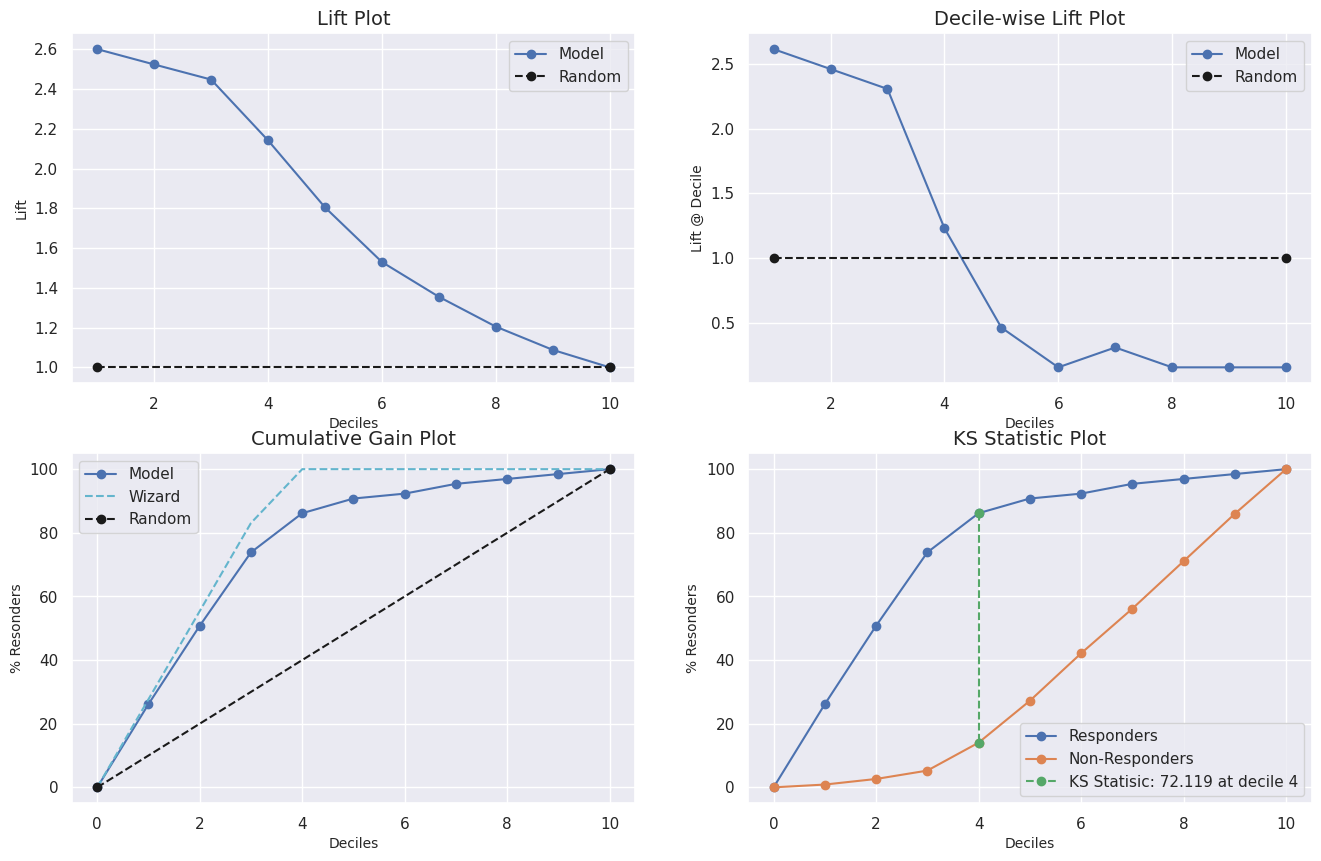

In [92]:
import kds
# LIFT PLOT

# Predict on the test set
y_pred_proba = rf_model_tunned.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Assuming a1 is a DataFrame that includes actual and predicted values
a = pd.DataFrame({
    'flg_churn': y_test,
    'Score_1': y_pred_proba
})

# Generate the metrics report
kds.metrics.report(a['flg_churn'], a['Score_1'])

In [106]:
import shap
import matplotlib.pyplot as plt
shap.initjs()

In [107]:
explainer = shap.Explainer(gb_model)
shap_values = explainer.shap_values(X_test)

#shap.summary_plot(shap_values[1], X_test)

In [109]:
print("Number of features in X_test:", X_test.shape[1])

Number of features in X_test: 30


In [110]:
print("Shape of shap_values[0]:", shap_values[0].shape)
print("Shape of shap_values[1]:", shap_values[1].shape)

Shape of shap_values[0]: (30,)
Shape of shap_values[1]: (30,)


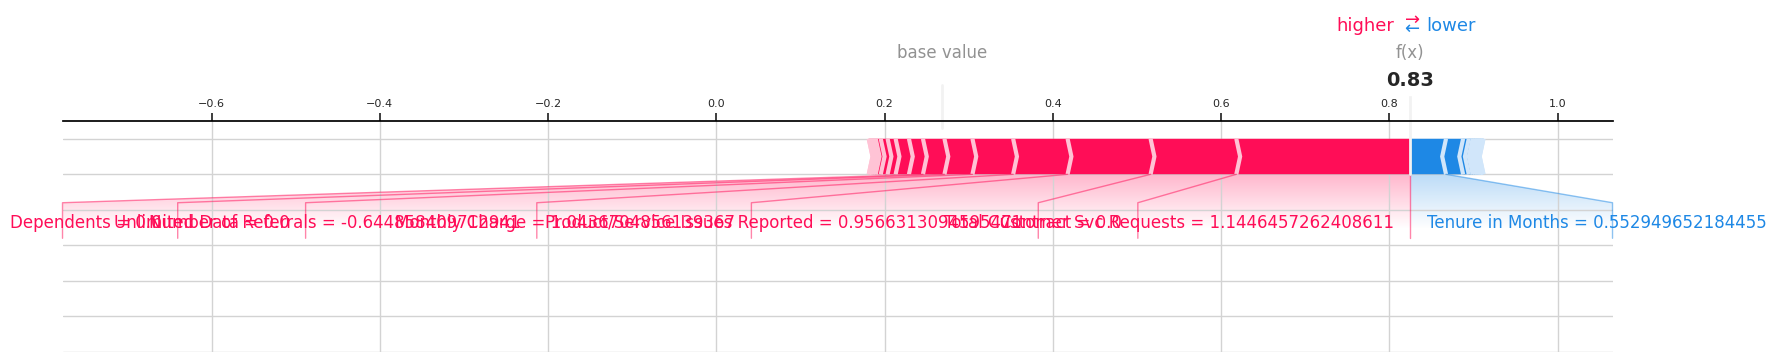

In [91]:
# Create a SHAP explainer for the model
explainer = shap.TreeExplainer(rf_model_tunned)

# Set the background color to white
#plt.style.use('seaborn-white')

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

client_index = 100  # Change this to the index of the client you want to analyze

# Select SHAP values for the positive class (class 1)
shap_values_single_class = shap_values[client_index][:, 1]

# Set background color to white and adjust font size for readability
plt.rcParams.update({
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.grid': True,
    'grid.color': 'lightgray',
    'font.size': 10,  # Decrease font size to reduce overlapping
    'figure.figsize': (20, 3),  # Adjust figure size as needed
    'xtick.labelsize': 8,  # Smaller x-axis label size
    'ytick.labelsize': 8  # Smaller y-axis label size
})

# Plot the SHAP force plot for class 1
client_index = 100  # Index of the client to analyze
shap.force_plot(explainer.expected_value[1], shap_values[client_index][:,1], X_test.iloc[client_index], 
                matplotlib=True, figsize=(20, 3))

In [75]:
print(type(shap_values))
print(shap_values.shape)
print(type(explainer.expected_value))
print(explainer.expected_value.shape if isinstance(explainer.expected_value, np.ndarray) else explainer.expected_value)

<class 'numpy.ndarray'>
(1409, 30, 2)
<class 'numpy.ndarray'>
(2,)
